Data Science Assignment-1

In [1]:
#Importing required libraries
!pip install missingno
!pip freeze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
from calendar import day_name

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


alabaster==0.7.10
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==1.6.1
astropy==2.0.3
attrs==17.4.0
Babel==2.5.3
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.1.2
bokeh==0.12.13
boto==2.48.0
Bottleneck==1.2.1
branca==0.3.1
certifi==2019.3.9
cffi==1.11.4
chardet==3.0.4
click==6.7
cloudpickle==0.5.2
clyent==1.2.2
colorama==0.3.9
comtypes==1.1.4
conda==4.4.10
conda-build==3.4.1
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.1.4
cycler==0.10.0
Cython==0.27.3
cytoolz==0.9.0
dask==0.16.1
datashape==0.5.4
decorator==4.2.1
distributed==1.20.2
docutils==0.14
entrypoints==0.2.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.13
Flask==0.12.2
Flask-Cors==3.0.3
folium==0.9.1
gevent==1.2.2
glob2==0.6
greenlet==0.4.12
h5py==2.7.1
heapdict==1.0.0
html5lib==1.0.1
idna==2.6
imageio==2.2.0
imagesize==0.7.1
ipython==6.2.1
ipython-genutils==0.2.0
ipywidgets==7.1.1
isort==4

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('example_sprit_cut_station.csv', sep=';')
data_prices=pd.read_csv('example_sprit_cut_prices.csv',sep=';')
d1=pd.read_csv('example_sprit_cut_prices.csv',sep=';')
d2=pd.read_csv('example_sprit_cut_station.csv', sep=';')



# Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [4]:
data.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [5]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [6]:
data_prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [7]:
#drop price less than or equal to zero
def drop_invalids(col_name):
    col_df = d1[d1[col_name]<=0]
    d1.drop(col_df.index,axis=0,inplace=True)

drop_invalids('E5')
drop_invalids('E10')
drop_invalids('DIESEL')

In [8]:
d1.describe()

,E5,E10,DIESEL,CHANGED
count,2.150850e+06,2.150850e+06,2.150850e+06,2.150850e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045052e+02,9.922575e+01,1.024969e+02,7.726614e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [9]:
#dropping columns
d2.drop(['HOUSE_NUMBER','POST_CODE','STREET'], axis=1, inplace=True)

In [10]:
d2.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [11]:
#dropping nicht_aktiv rows
brands_nicht_aktiv=d2[d2['BRAND']=='nicht mehr aktiv']
d2.drop(brands_nicht_aktiv.index,axis=0,inplace=True)

In [12]:
#replacing brand name \\N 
d2['BRAND'].fillna(value='No Brand', inplace= True)
d2['BRAND'].replace(to_replace=['\\N'],value='No Brand',inplace=True)

In [13]:
d1.shape

(2150850, 6)

In [14]:
#dropping duplicates
d1.drop_duplicates(inplace= True)

In [15]:
d1.shape

(1075425, 6)

In [16]:
d1['DATE_CHANGED']=pd.to_datetime(d1.DATE_CHANGED)

In [17]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075425 entries, 0 to 2177846
Data columns (total 6 columns):
STID            1075425 non-null object
E5              1075425 non-null int64
E10             1075425 non-null int64
DIESEL          1075425 non-null int64
DATE_CHANGED    1075425 non-null datetime64[ns]
CHANGED         1075425 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 57.4+ MB


In [18]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


In [19]:
#cleaning brands
d2['BRAND'].replace(to_replace=['Supermarkt-Tankstelle'],value='Supermarkt Tankstelle',inplace=True)
d2['BRAND']=d2['BRAND'].str.upper()
d2['BRAND'].replace(to_replace=['FREIE'],value='FREIE TANKSTELLE',inplace=True)
d2['BRAND']=np.where(d2['BRAND']== 'NO BRAND', d2['NAME'], d2['BRAND'])
d2.drop_duplicates(inplace=True)

In [20]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 709
Data columns (total 9 columns):
ID                           411 non-null object
VERSION                      411 non-null int64
VERSION_TIME                 411 non-null object
NAME                         411 non-null object
BRAND                        411 non-null object
PLACE                        409 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    411 non-null object
LAT                          411 non-null float64
LNG                          411 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 32.1+ KB


In [21]:
#calculating history based on DATE_CHANGED and STID
stid_start_min=d1.groupby('STID')['DATE_CHANGED'].min().reset_index()
stid_start_max=d1.groupby('STID')['DATE_CHANGED'].max().reset_index()
max_date=stid_start_max['DATE_CHANGED']
min_date= stid_start_min['DATE_CHANGED']
no_days= max_date-min_date
no_days= no_days.apply(lambda x: x.days)
stid_start_min['No_Days']=no_days

In [22]:
no_days.head()

0    394
1    477
2    404
3    477
4    406
Name: DATE_CHANGED, dtype: int64

In [23]:
#importing datetime
from datetime import datetime

In [24]:
def drop_outliers(y):
    data_mean, data_std= d1[y].mean(),d1[y].std()
    cut_off=data_std*3
    lower,upper= data_mean- cut_off, data_mean+cut_off
    d1[y]=np.where(np.logical_or(d1[y]<lower,d1[y]>upper),d1[y].median(),d1[y])


In [25]:
drop_outliers('E5')
drop_outliers('E10')
drop_outliers('DIESEL')



In [26]:
#converting prices into Euros
for fuel in ['E5','E10','DIESEL']:
    d1[fuel]=d1[fuel]/1000

In [27]:
d1.describe()

,E5,E10,DIESEL,CHANGED
count,1.075425e+06,1.075425e+06,1.075425e+06,1.075425e+06
mean,1.456998e+00,1.429060e+00,1.247647e+00,1.900296e+01
std,1.010930e-01,9.693802e-02,9.944063e-02,7.726616e+00
min,1.148000e+00,1.139000e+00,9.990000e-01,1.000000e+00
25%,1.379000e+00,1.359000e+00,1.169000e+00,2.100000e+01
50%,1.459000e+00,1.430000e+00,1.239000e+00,2.100000e+01
75%,1.529000e+00,1.499000e+00,1.319000e+00,2.100000e+01
max,1.769000e+00,1.719000e+00,1.549000e+00,6.300000e+01


In [28]:
d2.describe()

,VERSION,LAT,LNG
count,411.000000,411.000000,411.000000
mean,130.236010,49.321829,8.190684
std,269.088951,0.255060,0.283531
min,1.000000,48.800790,7.505350
25%,1.000000,49.105305,8.106500
50%,4.000000,49.373610,8.289295
75%,22.000000,49.509858,8.404538
max,881.000000,49.799397,8.499941


# Question 1: How many different stations exist in the data set and what is the existing history in days (bar chart)?


In [29]:
d2.rename(columns={'ID':'STID'}, inplace=True)

In [30]:
#merge both data frames to get the brand data
df= pd.merge(d1,d2, on='STID')

In [31]:
df.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.589,1.549,1.389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.539,1.499,1.339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.529,1.489,1.329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847


In [32]:
#merge data to get the number of days
df = pd.merge(df, stid_start_min, on='STID')

In [33]:
df.drop('DATE_CHANGED_y',axis=1,inplace=True)

In [34]:
df.head()

,STID,E5,E10,DIESEL,DATE_CHANGED_x,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,No_Days
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.589,1.549,1.389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.539,1.499,1.339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.529,1.489,1.329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478


In [35]:
#To extract number of days and brand to get the history
df_brands= df.groupby('BRAND').min()[['STID','No_Days']].reset_index()

In [36]:
df_brands.shape

(58, 3)

In [37]:
df_brands.head()

,BRAND,STID,No_Days
0,AGIP,1a5a35de-01fb-482f-8808-90118eddb47a,464
1,ARAL,00b33b42-8357-40c2-baf5-c7c49b40b2af,476
2,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,e69a923a-ba11-409b-2720-2b908ed66498,477
3,AUTO ZOTZ LANDAU IN DER PFALZ TANKEN UND WAS...,a21e3ed2-6d03-478f-32a3-9f33202182bc,477
4,AVIA,14ec4b5b-18f3-4664-b768-1958f9e3b49f,478


[Text(0,0,'AGIP'),
 Text(0,0,'ARAL'),
 Text(0,0,'AUTO ZOTZ HERXHEIM B.LD.       TANKEN AN L.493'),
 Text(0,0,'AUTO ZOTZ LANDAU IN DER PFALZ   TANKEN UND WASCHEN'),
 Text(0,0,'AVIA'),
 Text(0,0,'BFT'),
 Text(0,0,'CLASSIC'),
 Text(0,0,'Dudenhöffer & Rung GmbH'),
 Text(0,0,'E CENTER'),
 Text(0,0,'EBERHARDT JÖHLINGEN'),
 Text(0,0,'ED'),
 Text(0,0,'ELAN'),
 Text(0,0,'ESSO'),
 Text(0,0,'Eberhardt Hardeckstraße Karlsruhe'),
 Text(0,0,'Eberhardt Rastatter Straße Karlsruhe'),
 Text(0,0,'FREI'),
 Text(0,0,'FREIE TANKSTELLE'),
 Text(0,0,'FRITZ WALTER GMBH'),
 Text(0,0,'FRÜHMESSER GMBH'),
 Text(0,0,'Globus Handelshof GmbH & Co. KG  Betriebsstätte Bobenheim-Roxheim'),
 Text(0,0,'Globus Handelshof GmbH & Co. KG  Betriebsstätte Kaiserslautern'),
 Text(0,0,'Globus Handelshof GmbH & Co. KG Betriebsstätte Grünstadt'),
 Text(0,0,'Globus Handelshof GmbH & Co. KG Betriebsstätte Neustadt'),
 Text(0,0,'Globus Handelshof GmbH & Co.KG Betriebsstätte Ludwigshafen-Oggersheim'),
 Text(0,0,'HEM'),
 Text(0,0,'JET')

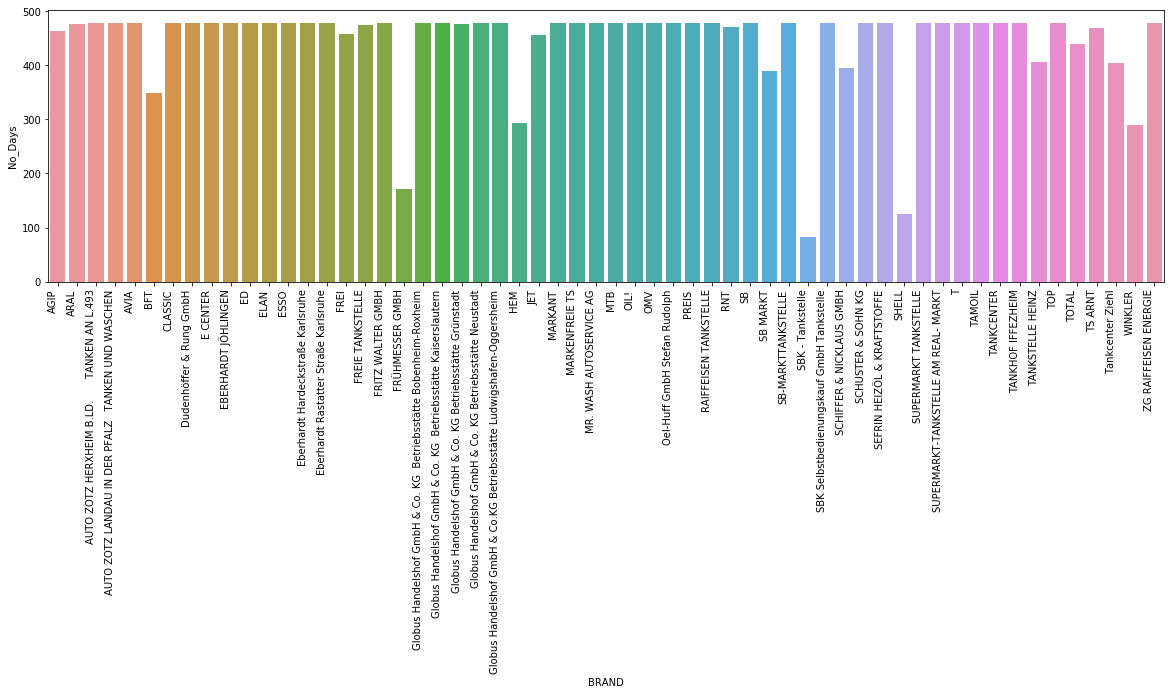

In [38]:
plt.figure(figsize=(20,5))

q1=sns.barplot(x="BRAND",y="No_Days",data=df_brands)
q1.set_xticklabels(q1.get_xticklabels(), rotation=90, ha="right")


# There are 58 stations in total

# Question 2:What is the min, mean, max price for each gasoline type and station weekly (timeseries graph)

Text(0.5,1,'Weekly prices of E5')

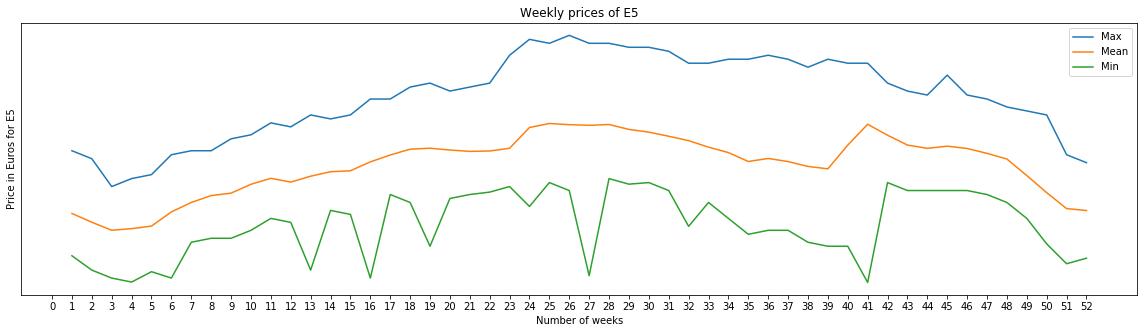

In [39]:
plt.figure(figsize=(20,5))
max_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.max().plot(label='Max',xticks=range(0,53,1),yticks=range(900,1850,50))
mean_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.mean().plot(label='Mean')
min_plot_e5 = d1.groupby(d1.DATE_CHANGED.dt.week).E5.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros for E5')
plt.title('Weekly prices of E5')

Text(0.5,1,'Weekly prices of E10')

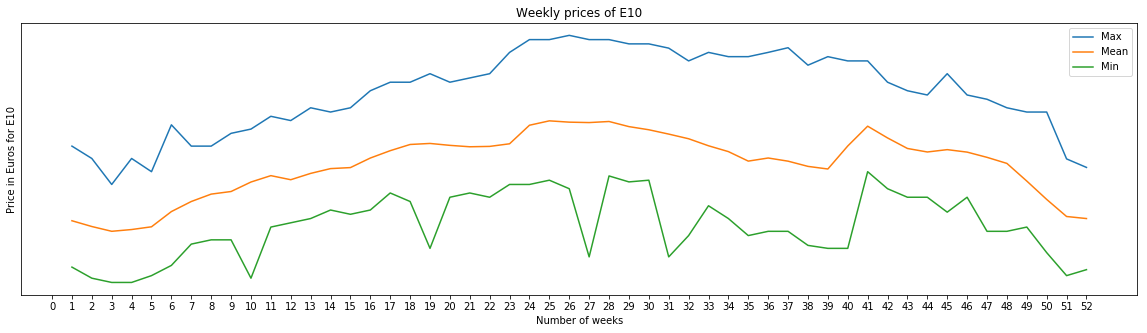

In [40]:
plt.figure(figsize=(20,5))
max_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.max().plot(label='Max',xticks=range(0,53,1),yticks=range(900,1850,50),)
mean_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.mean().plot(label='Mean')
min_plot_e10 = d1.groupby(d1.DATE_CHANGED.dt.week).E10.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros for E10')
plt.title('Weekly prices of E10')

Text(0.5,1,'Weekly prices of Diesel')

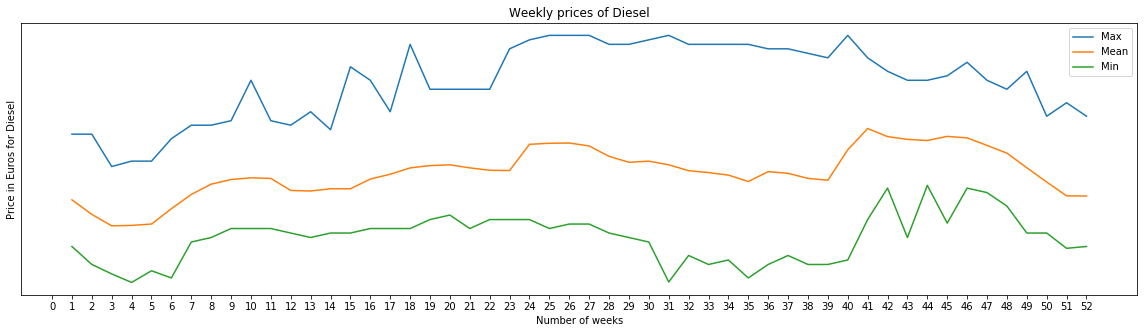

In [41]:
plt.figure(figsize=(20,5))
max_plot_diesel = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.max().plot(label='Max',xticks=range(0,53,1),yticks=range(900,1850,50))
mean_plot_diesel = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.mean().plot(label='Mean')
min_plot_diesel = d1.groupby(d1.DATE_CHANGED.dt.week).DIESEL.min().plot(label='Min')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros for Diesel')
plt.title('Weekly prices of Diesel')

# Question 3:What is cheapest station (in average) and why?

In [42]:
#Grouping Data to find the cheapest station
cheap_stn_E5=df.groupby('BRAND')['E5'].min().sort_values().reset_index()
cheap_stn_E10=df.groupby('BRAND')['E10'].min().sort_values().reset_index()
cheap_stn_D=df.groupby('BRAND')['DIESEL'].min().sort_values().reset_index()
cheap_stn=pd.merge(pd.merge(cheap_stn_E5,cheap_stn_E10,on="BRAND"),cheap_stn_D,on="BRAND")

In [43]:
cheap_stn.head()

,BRAND,E5,E10,DIESEL
0,FREIE TANKSTELLE,1.148,1.179,1.029
1,HEM,1.149,1.139,0.999
2,SUPERMARKT TANKSTELLE,1.159,1.139,0.999
3,BFT,1.159,1.149,1.034
4,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999


In [44]:
#To calculate mean and add a column of calculated mean
cheap_stn['Mean']=cheap_stn.mean(axis=1)

In [45]:
cheap_stn.head()

,BRAND,E5,E10,DIESEL,Mean
0,FREIE TANKSTELLE,1.148,1.179,1.029,1.118667
1,HEM,1.149,1.139,0.999,1.095667
2,SUPERMARKT TANKSTELLE,1.159,1.139,0.999,1.099000
3,BFT,1.159,1.149,1.034,1.114000
4,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999,1.099000


In [46]:
cheap_stn.head()

,BRAND,E5,E10,DIESEL,Mean
0,FREIE TANKSTELLE,1.148,1.179,1.029,1.118667
1,HEM,1.149,1.139,0.999,1.095667
2,SUPERMARKT TANKSTELLE,1.159,1.139,0.999,1.099000
3,BFT,1.159,1.149,1.034,1.114000
4,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999,1.099000


In [47]:
#cheap_stn.sort_values(by="Mean",inplace=True)

In [48]:
cheap_stn=cheap_stn.reset_index()

In [49]:
#Finding row with the STID
min_index = cheap_stn['Mean'].idxmin()
cheapest_brand = cheap_stn.iloc[min_index]['BRAND']

In [50]:
#Finding the costliest brand
max_index = cheap_stn['Mean'].idxmax()
costliest_brand = cheap_stn.iloc[max_index]['BRAND']
costliest_brand

'FREI'

In [51]:
cheapest_brand

'HEM'

 HEM is the cheapest brand and the station is cheapest because the mean price of all the three types of fuel given is minimum.

# Question 4:At which day of a week is the price most likely the cheapest (week profile)

In [52]:
df.head()


,STID,E5,E10,DIESEL,DATE_CHANGED_x,CHANGED,VERSION,VERSION_TIME,NAME,BRAND,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,No_Days
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.589,1.549,1.389,2014-10-02 05:22:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.369,2014-10-02 05:26:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.569,1.529,1.359,2014-10-02 09:06:01,1,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.539,1.499,1.339,2014-10-03 12:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1.529,1.489,1.329,2014-10-03 14:14:01,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,WORMS,\N,49.633409,8.273847,478


In [53]:
day_week_avg=df.groupby(df.DATE_CHANGED_x.dt.weekday_name)[['E5','E10','DIESEL']].mean().reset_index()

In [54]:
day_week_avg['Mean_Price']=day_week_avg.mean(axis=1)

In [55]:

day_week_avg = day_week_avg.groupby(['DATE_CHANGED_x']).sum().reindex(day_name[0:7]) 
day_week_avg

,E5,E10,DIESEL,Mean_Price
DATE_CHANGED_x,,,,
Monday,1.458794,1.430496,1.249915,1.379735
Tuesday,1.456923,1.428942,1.247273,1.377713
Wednesday,1.456642,1.428680,1.247101,1.377475
Thursday,1.455991,1.428041,1.246842,1.376958
Friday,1.455638,1.427668,1.246441,1.376582
Saturday,1.454794,1.427018,1.245856,1.375889
Sunday,1.461109,1.433627,1.250781,1.381839


In [56]:
cheapest_day = day_week_avg['Mean_Price'].idxmin()
cheapest_day

'Saturday'

Text(0,0.5,'Price in Euros')

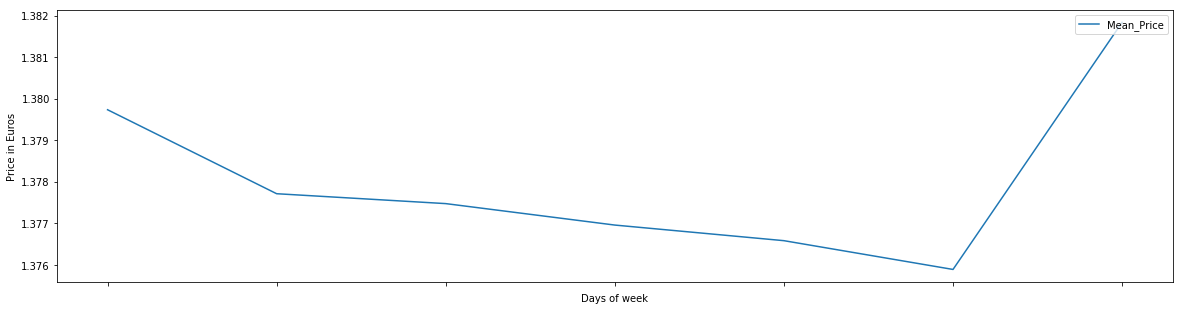

In [57]:
day_week_avg['Mean_Price'].plot(figsize=(20,5))

plt.legend(loc='upper right')
plt.xlabel('Days of week')
plt.ylabel('Price in Euros')

 Cheapest average fuel prices are on Saturday

# Question 5:At which hour during a day is the price the cheapest in average (hour profile)

In [58]:
hour_avg=df.groupby(df.DATE_CHANGED_x.dt.hour)[['DIESEL','E5','E10']].min()

In [59]:
hour_avg['Mean']=hour_avg.mean(axis=1)


In [60]:
hour_avg.sort_values(by="Mean")

,DIESEL,E5,E10,Mean
DATE_CHANGED_x,,,,
18,0.999,1.149,1.139,1.095667
17,0.999,1.159,1.139,1.099000
13,1.000,1.159,1.139,1.099333
19,0.999,1.159,1.149,1.102333
16,0.999,1.169,1.149,1.105667
12,1.019,1.159,1.139,1.105667
15,0.999,1.159,1.159,1.105667
10,1.009,1.159,1.159,1.109000
9,1.025,1.148,1.159,1.110667


In [61]:
cheapest_hour = hour_avg['Mean'].idxmin()
cheapest_hour

18

Text(0,0.5,'Price in Euros')

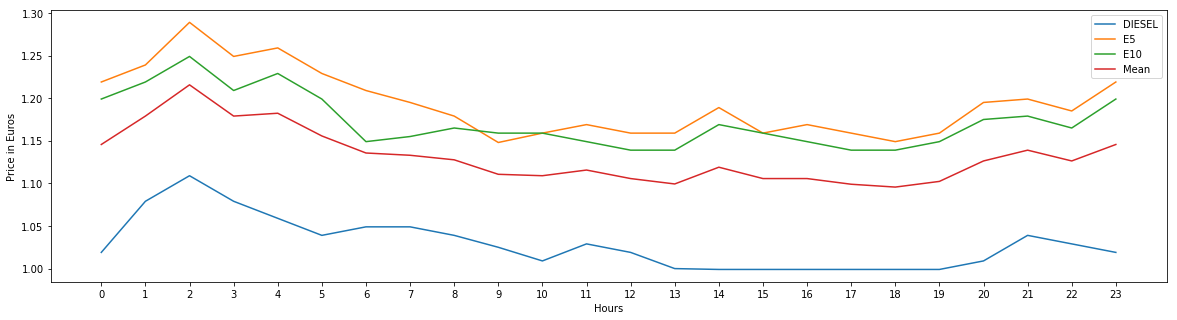

In [62]:

hour_avg.plot.line(figsize=(20,5),xticks=range(0,24,1))
plt.legend(loc='upper right')
plt.xlabel('Hours')
plt.ylabel('Price in Euros')

# Cheapest average fuel prices are at 18:00

# Question 6:How many different station locations are present in the data (visualize via a map)

In [63]:
different_locations = d2[['LAT','LNG']]
different_locations.drop_duplicates(inplace=True)

C:\Users\Sashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
!pip install folium

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [65]:
import folium
map = folium.Map(location=[49.633409, 8.273847], zoom_start=7)
for point in range(0, len(different_locations)):
    folium.Marker([different_locations.iloc[point,0],different_locations.iloc[point,1]], popup="test").add_to(map)
map

There are 407 different locations

# Question 7:What is the gas station which has most price data points, choose one and draw the time series for all 3 gasonline types

In [66]:
brand_price=df[['BRAND','E5','E10','DIESEL','DATE_CHANGED_x']]

In [67]:
brand_data_points=brand_price.BRAND.value_counts()
max_branddata=brand_data_points.idxmax()

In [68]:
#Shell has maximum number of data points
#Extracting data points of SHELL brand
mostdata_brand_df= brand_price[brand_price['BRAND']==max_branddata].reset_index()

In [69]:
mostdata_brand_df.head()

,index,BRAND,E5,E10,DIESEL,DATE_CHANGED_x
0,11212,SHELL,1.399,1.379,1.139,2015-08-13 14:50:01
1,11213,SHELL,1.379,1.359,1.139,2015-08-13 15:18:01
2,11214,SHELL,1.409,1.389,1.139,2015-08-14 13:14:01
3,11215,SHELL,1.399,1.379,1.139,2015-08-14 13:30:01
4,11216,SHELL,1.419,1.399,1.169,2015-08-15 12:02:01


In [70]:
mostdata_brand_df.drop("index",axis=1,inplace=True)

In [71]:
mostdata_brand_df.head()

,BRAND,E5,E10,DIESEL,DATE_CHANGED_x
0,SHELL,1.399,1.379,1.139,2015-08-13 14:50:01
1,SHELL,1.379,1.359,1.139,2015-08-13 15:18:01
2,SHELL,1.409,1.389,1.139,2015-08-14 13:14:01
3,SHELL,1.399,1.379,1.139,2015-08-14 13:30:01
4,SHELL,1.419,1.399,1.169,2015-08-15 12:02:01


Text(0,0.5,'Price in Euros')

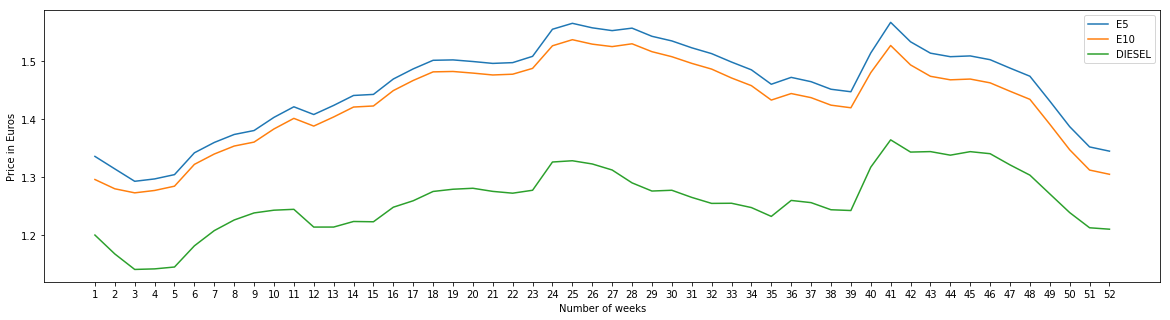

In [72]:
plt.figure(figsize=(20,5))
mostdata_brand_df.groupby(mostdata_brand_df.DATE_CHANGED_x.dt.week).E5.mean().plot(xticks=range(1,53,1))
mostdata_brand_df.groupby(mostdata_brand_df.DATE_CHANGED_x.dt.week).E10.mean().plot(xticks=range(1,53,1))
mostdata_brand_df.groupby(mostdata_brand_df.DATE_CHANGED_x.dt.week).DIESEL.mean().plot(xticks=range(1,53,1))
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')


 Station with maximum data points is Shell 

# Question 8: At which hour during a day do we have the most price changes

In [73]:
brand_price=df[['BRAND','E5','E10','DIESEL','DATE_CHANGED_x']]

Text(0,0.5,'Count')

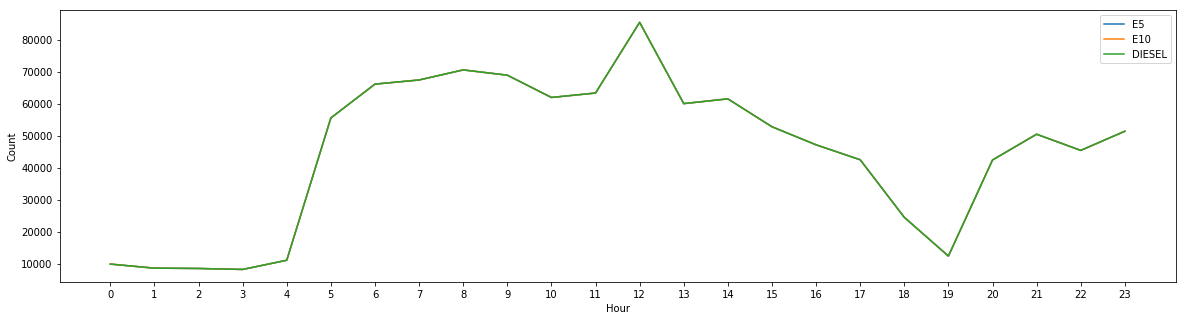

In [74]:
price_change=brand_price.groupby(brand_price.DATE_CHANGED_x.dt.hour)['E5','E10','DIESEL'].count().plot(figsize=(20,5),xticks=range(0,24))
plt.xlabel('Hour')
plt.ylabel('Count')

Maximum changes occur at 12:00


# Question 9:Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [75]:
stid_start_min.groupby('No_Days').STID.count().nlargest()

No_Days
478    329
477     40
476      6
459      2
82       1
Name: STID, dtype: int64

In [76]:
cheap_stn[['No_Days','DATE_CHANGED_x']]=df[['No_Days','DATE_CHANGED_x']]

In [77]:
top_brands=cheap_stn.sort_values(['No_Days','Mean'],ascending=[False,True]).reset_index()

In [78]:
top_20=top_brands.iloc[:20]
top_20

,level_0,index,BRAND,E5,E10,DIESEL,Mean,No_Days,DATE_CHANGED_x
0,1,1,HEM,1.149,1.139,0.999,1.095667,478,2014-10-02 05:26:01
1,2,2,SUPERMARKT TANKSTELLE,1.159,1.139,0.999,1.099000,478,2014-10-02 09:06:01
2,4,4,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999,1.099000,478,2014-10-03 14:14:01
3,7,7,JET,1.169,1.149,0.999,1.105667,478,2014-10-06 07:38:01
4,5,5,OMV,1.159,1.159,1.009,1.109000,478,2014-10-04 23:10:01
5,3,3,BFT,1.159,1.149,1.034,1.114000,478,2014-10-03 12:14:01
6,6,6,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,1.165,1.155,1.025,1.115000,478,2014-10-06 06:02:01
7,0,0,FREIE TANKSTELLE,1.148,1.179,1.029,1.118667,478,2014-10-02 05:22:01
8,13,13,MR. WASH AUTOSERVICE AG,1.189,1.159,1.009,1.119000,478,2014-10-11 06:22:02
9,8,8,AUTO ZOTZ LANDAU IN DER PFALZ TANKEN UND WAS...,1.175,1.155,1.035,1.121667,478,2014-10-06 08:26:01


In [79]:
month_data=top_20.groupby(top_20.DATE_CHANGED_x.dt.month)[['E10','DIESEL']].max()

In [80]:
top_20.set_index('DATE_CHANGED_x')
top_20.drop(['level_0','index'],axis=1,inplace=True)

C:\Users\Sashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
top_20.set_index('DATE_CHANGED_x')

,BRAND,E5,E10,DIESEL,Mean,No_Days
DATE_CHANGED_x,,,,,,
2014-10-02 05:26:01,HEM,1.149,1.139,0.999,1.095667,478
2014-10-02 09:06:01,SUPERMARKT TANKSTELLE,1.159,1.139,0.999,1.099000,478
2014-10-03 14:14:01,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999,1.099000,478
2014-10-06 07:38:01,JET,1.169,1.149,0.999,1.105667,478
2014-10-04 23:10:01,OMV,1.159,1.159,1.009,1.109000,478
2014-10-03 12:14:01,BFT,1.159,1.149,1.034,1.114000,478
2014-10-06 06:02:01,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,1.165,1.155,1.025,1.115000,478
2014-10-02 05:22:01,FREIE TANKSTELLE,1.148,1.179,1.029,1.118667,478
2014-10-11 06:22:02,MR. WASH AUTOSERVICE AG,1.189,1.159,1.009,1.119000,478


In [82]:
top_20['Datetime'] = pd.to_datetime(top_20['DATE_CHANGED_x'])
top_20 = top_20.set_index('Datetime')

C:\Users\Sashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
top_20.drop('DATE_CHANGED_x',axis=1,inplace=True)

In [84]:
top_20

,BRAND,E5,E10,DIESEL,Mean,No_Days
Datetime,,,,,,
2014-10-02 05:26:01,HEM,1.149,1.139,0.999,1.095667,478
2014-10-02 09:06:01,SUPERMARKT TANKSTELLE,1.159,1.139,0.999,1.099000,478
2014-10-03 14:14:01,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999,1.099000,478
2014-10-06 07:38:01,JET,1.169,1.149,0.999,1.105667,478
2014-10-04 23:10:01,OMV,1.159,1.159,1.009,1.109000,478
2014-10-03 12:14:01,BFT,1.159,1.149,1.034,1.114000,478
2014-10-06 06:02:01,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,1.165,1.155,1.025,1.115000,478
2014-10-02 05:22:01,FREIE TANKSTELLE,1.148,1.179,1.029,1.118667,478
2014-10-11 06:22:02,MR. WASH AUTOSERVICE AG,1.189,1.159,1.009,1.119000,478


In [85]:
top_20.resample('H').mean()
top_20

,BRAND,E5,E10,DIESEL,Mean,No_Days
Datetime,,,,,,
2014-10-02 05:26:01,HEM,1.149,1.139,0.999,1.095667,478
2014-10-02 09:06:01,SUPERMARKT TANKSTELLE,1.159,1.139,0.999,1.099000,478
2014-10-03 14:14:01,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,1.159,1.139,0.999,1.099000,478
2014-10-06 07:38:01,JET,1.169,1.149,0.999,1.105667,478
2014-10-04 23:10:01,OMV,1.159,1.159,1.009,1.109000,478
2014-10-03 12:14:01,BFT,1.159,1.149,1.034,1.114000,478
2014-10-06 06:02:01,AUTO ZOTZ HERXHEIM B.LD. TANKEN AN L.493,1.165,1.155,1.025,1.115000,478
2014-10-02 05:22:01,FREIE TANKSTELLE,1.148,1.179,1.029,1.118667,478
2014-10-11 06:22:02,MR. WASH AUTOSERVICE AG,1.189,1.159,1.009,1.119000,478


In [87]:
top_20.between_time('12:00', '13:00')

,BRAND,E5,E10,DIESEL,Mean,No_Days
Datetime,,,,,,
2014-10-03 12:14:01,BFT,1.159,1.149,1.034,1.114000,478
2014-10-14 12:18:01,SUPERMARKT-TANKSTELLE AM REAL- MARKT,1.189,1.159,1.019,1.122333,478
2014-10-14 12:14:01,E CENTER,1.189,1.169,1.029,1.129000,478


# Question 10:Describe a possible business potential in € for the customer (textual descriptionin the ipyhton file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

* The fleet management can save money by refueling the vehicles at the cheapest station. The cheapest station is HEM with respect to the average of all three fuels.
* The fleet management should consider refueling at 18:00 as the average price of all the three fuels is cheapest.The management should make sure that they don't refuel at 12:00 as the price fluctuation is highest during this time.
* The fleet management should plan such that the vehicles must be refeueled on Saturdays as the prices are cheapest and avoid the refueling on Sundays or Mondays as the fuel prices are significantly high on these days
* The fleet management should also consider the nearset cheaper station to refuel as it is not economical to drive to the cheapest station if it is far from the current position.
* The management should avoid refueling at FREI as it is the costliest brand.
* The fleet should always consider to have Diesel vehicles as the price of diesel is significantly lower than E5 and E10 fuels, it will reduce the operations cost of the firm.